# CNN - Fashion MNIST
- Agustín Yornet de Rosas (13921)

Fashion-MNIST es un dataset de imágenes de artículos de Zalando, tienda de ropa alemana, que consta de un conjunto de *training* de 60.000 ejemplos y un conjunto de *test* de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de entre 10 clases.

Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, lo que hace un total de 784 píxeles. A su vez, cada píxel tiene asociado un valor que indica la claridad u oscuridad de ese píxel. Este valor es un entero comprendido entre 0 y 255.

Los conjuntos de datos de entrenamiento y de prueba tienen 785 columnas. La primera columna contiene las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxel de la imagen asociada.

## 0 - Importación de Librerías

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 1 - Visualización de los Datos

In [25]:
train_df = pd.read_csv('drive/MyDrive/FashionMNISTDataset/fashion-mnist_train.csv')
test_df = pd.read_csv('drive/MyDrive/FashionMNISTDataset/fashion-mnist_test.csv')

In [26]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tanto *train* como *test* tienen dos tipos de columnas:

* Label: Cada dígito del 0 al 9 representa una prenda de vestir distinta.
* pixelN: Tiene un valor entre 0 y 255 que representa la claridad de cada píxel, siendo 0 el valor más oscuro y 255 el valor más claro.

Hay que convertir los dataframes en arreglos de `numpy` con datos de tipo `float32`, que es el tipo de datos aceptado por Keras.

In [28]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

A su vez, como los valores de los píxeles en los datos de *train* y *test* se encuentran entre 0 y 255, hay que reescalarlos para que ahora tengan un valor entre 0 y 1.

In [29]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [30]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,
                                                         y_train,
                                                         test_size = 0.2,
                                                         random_state = 12345)

Como se mencionó antes, cada dígito del 0 al 9 de la columna "label" representa una prenda distinta de ropa. Por ende, mapeamos cada dígito de la primera columna con el nombre de cada clase o prenda, y visualizamos las primeras 36 prendas junto a la etiqueta correspondiente.

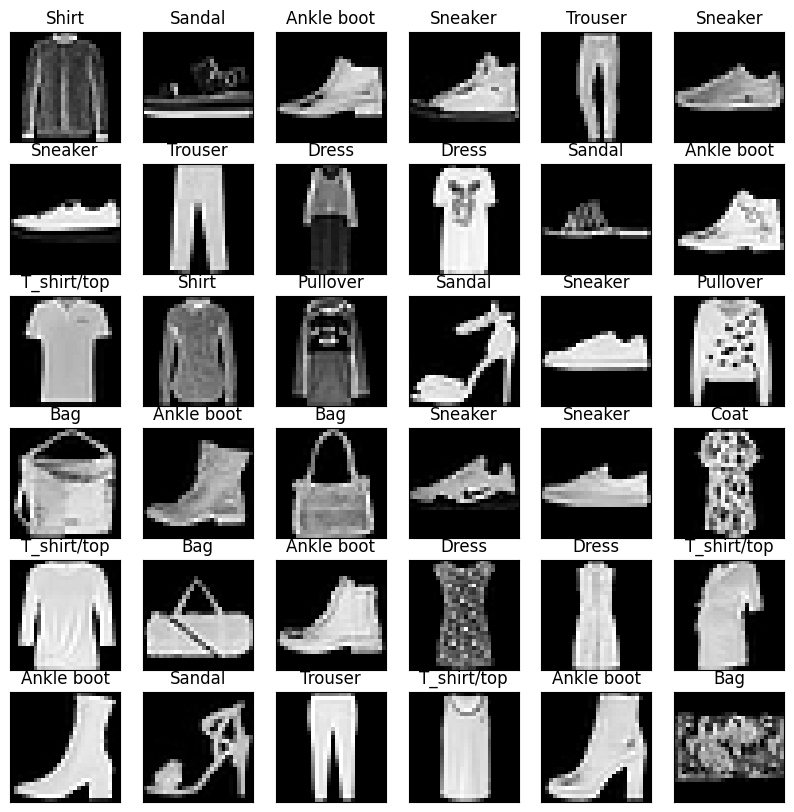

In [31]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap = 'gray')
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

## 2 - Construcción de la CNN

La CNN recibe como entradas tensores que tengan como *shape* 28 filas y 28 columnas, con un sólo canal de color por ser imágenes monocromáticas.

Por ende, es necesario realizar un *reshape* a cada uno de los vectores (Rank-1 Tensor) para transformarlos en matrices (Rank-2 Tensor).

In [32]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [33]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [53]:
cnn_model = Sequential([
    Convolution2D(filters=32, kernel_size=3,
                  activation='relu', input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics =['accuracy'])

In [56]:
print(cnn_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

None


## 3 - Ejecución y resultados de la CNN

In [37]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = 100,
    verbose = 1,
    validation_data = (x_validate,y_validate)
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.9112 - loss: 0.2543 - val_accuracy: 0.9050 - val_loss: 0.2735
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9123 - loss: 0.2494 - val_accuracy: 0.9057 - val_loss: 0.2689
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9128 - loss: 0.2508 - val_accuracy: 0.9058 - val_loss: 0.2661
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9141 - loss: 0.2448 - val_accuracy: 0.9065 - val_loss: 0.2676
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9112 - loss: 0.2458 - val_accuracy: 0.9079 - val_loss: 0.2682
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9136 - loss: 0.2443 - val_accuracy: 0.9062 - val_loss: 0.2658
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9149 - loss: 0.2416 - val_accuracy: 0.9066 - val_loss: 0.2637
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9167 - loss: 0.2366 - val_accuracy: 0

Text(0.5, 1.0, 'Entrenamiento - Accuracy')

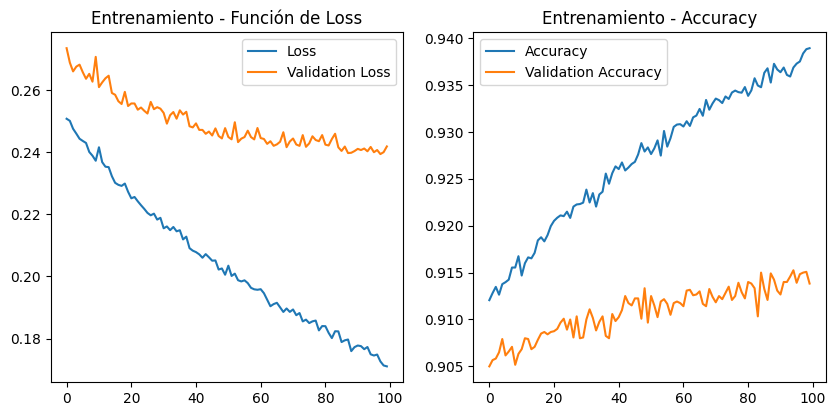

In [57]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Entrenamiento - Función de Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Entrenamiento - Accuracy')

In [47]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Error: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

Error: 0.2429
Accuracy: 0.9159


In [48]:
predictions = cnn_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

y_true = test_df.iloc[:, 0]

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.89      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.90      0.84      0.87      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.85      0.91      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## 4 - Comparación con una NN convencional.

In [59]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(
    x_train.reshape(x_train.shape[0], 784),
    y_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_data=(x_validate.reshape(x_validate.shape[0], 784), y_validate)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.3338 - loss: 2.0104 - val_accuracy: 0.6898 - val_loss: 1.0143
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6629 - loss: 0.9989 - val_accuracy: 0.7513 - val_loss: 0.7423
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7249 - loss: 0.7847 - val_accuracy: 0.7846 - val_loss: 0.6456
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7643 - loss: 0.6899 - val_accuracy: 0.8010 - val_loss: 0.5937
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7865 - loss: 0.6350 - val_accuracy: 0.8128 - val_loss: 0.5576
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8014 - loss: 0.5922 - val_accuracy: 0.8254 - val_loss: 0.5296
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8082 - loss: 0.5641 - val_accuracy: 0.8292 - val_loss: 0.5094
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8131 - loss: 0.5456 - val_accura

Error: 0.2958
Accuracy: 0.8931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.84      0.83      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.81      0.84      0.83      1000
     Class 3       0.92      0.91      0.91      1000
     Class 4       0.85      0.83      0.84      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.74      0.71      0.73      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



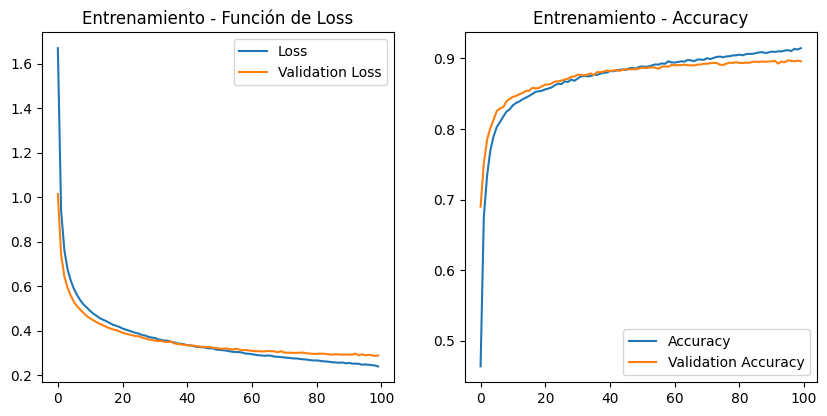

In [60]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Entrenamiento - Función de Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Entrenamiento - Accuracy')

score = model.evaluate(x_test.reshape(x_test.shape[0], 784), y_test, verbose=0)
print('Error: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

predictions = model.predict(x_test.reshape(x_test.shape[0], 784))
predicted_classes = np.argmax(predictions, axis=1)

y_true = test_df.iloc[:, 0]

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))